## *Problem 1*

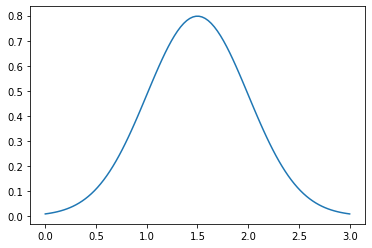

Mean :  1.5017915689842511
Variance :  0.2436403981474902
Skewness :  0.045633614839564005
kurtosis :  -0.09318812798848475
Standard Deviation:  0.5154551716361824
sigmaG :  0.5119566644128337


In [3]:
import numpy as np
from scipy.stats import norm, kurtosis, skew
import matplotlib.pyplot as plt
import astroML.stats

# Mean and Standard deviation of the Normal Distribution
mu = 1.5
sigma = 0.5

# Generating samples
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
samples = np.random.normal(mu,sigma,1000)
plt.plot(x, norm.pdf(x, mu, sigma))
plt.show()

print("Mean : ", np.mean(samples))
print("Variance : ", np.var(samples))
print("Skewness : ", skew(samples))
print("kurtosis : ", kurtosis(samples))

# Calculating Standard Deviation using MAD
median = np.median(samples)
median_samples = []
for point in samples:
    median_samples.append(abs(point - median))
mad = np.median(median_samples)

# Using the relation between MAD and Standard Deviation
std_dev = 1.482 * mad
print("Standard Deviation: ", std_dev)

# Calculating sigmaG of the samples
sigmaG = astroML.stats.sigmaG(samples)
print("sigmaG : ", sigmaG)

## *Problem 2*

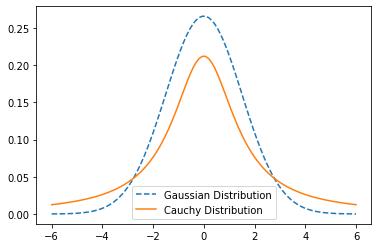

In [4]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

x = np.linspace(-6, 6, 100)
plt.plot(x, stats.norm.pdf(x, loc = 0, scale = 1.5), '--')
plt.plot(x, stats.cauchy.pdf(x, loc = 0, scale = 1.5))
plt.legend(['Gaussian Distribution', 'Cauchy Distribution'], loc = 'best')
plt.show()

## *Problem 3*

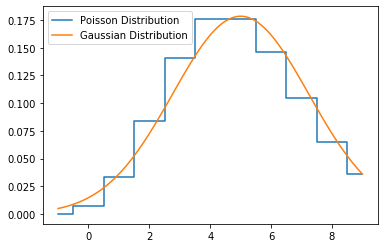

In [5]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

x = np.linspace(-1, 9, 11)
y = np.linspace(-1, 9, 100)
plt.plot(x, stats.poisson.pmf(x, 5), drawstyle = 'steps-mid')
plt.plot(y, stats.norm.pdf(y, loc = 5, scale = np.sqrt(5)))
plt.legend(['Poisson Distribution', 'Gaussian Distribution'], loc = 'best')
plt.show()

## *Problem 4*

In [9]:
samples = [0.8920, 0.881, 0.8913, 0.9837, 0.8958]
errors = [0.00044, 0.009, 0.00032, 0.00048, 0.00045]

weight, num, den = (0, 0, 0)
for i in range(len(samples)):
    weight = (1/(errors[i] * errors[i]))
    num = num + (weight * samples[i])
    den = den + weight

weighted_mean_lifetime = num/den
mean_uncertainity = 1/den

print("weighted_mean_lifetime : ", str(weighted_mean_lifetime))
print("mean_uncertainity : ", str(mean_uncertainity))

weighted_mean_lifetime :  0.9089185199574896
mean_uncertainity :  4.128510743662294e-08


## *Problem 5*

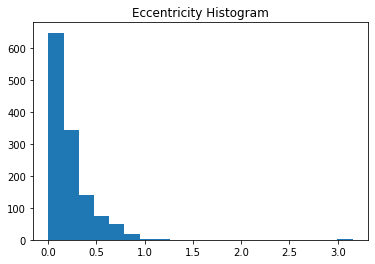

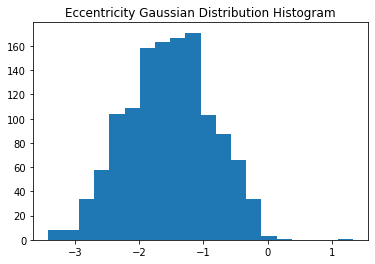

In [7]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("exoplanet.eu_catalog.csv")

# extracting eccentricity column from the csv
eccentricity = data['eccentricity']

# Drop the cells with Nan Values
eccentricity = eccentricity.dropna()
# Pick the eccentricity values greater than 0
eccentricity = [ele for ele in eccentricity if ele > 0]

# Histogram plot of the eccentricity values
plt.hist(eccentricity, bins = 20)
plt.title('Eccentricity Histogram')
plt.show()

# Gaussian plot using boxcox transformation
bcx,lbda = stats.boxcox(eccentricity)
plt.title('Eccentricity Gaussian Distribution Histogram')
plt.hist(bcx, bins = 20)
plt.show()